In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
# import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, classification_report
import functions as mylib
import time
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore') 

<div style="background-color: #091d82; color: white; border-left: 6px solid #97cca5; padding: 10px; font-family: Verdana; border-color:white;">
    <h3>Content</h3>
</div>
<div style="display: flex; align-items: flex-start; padding: 0px;">


<div style="flex: 1; padding: 0px; width:38%">
    <img src="https://static-www.elastic.co/v3/assets/bltefdd0b53724fa2ce/blta401f2e7dad39503/620d844d9d54947c7f131b0a/illustration-industry-health.png" width="400" height="50"/>
</div>

<div style="flex: 2; background-color: #820909; color: white; border-left: 6px solid #97cca5; padding: 0px; font-size: 18px; font-family: Verdana; width:62%">
    <strong>
    <ul>
        <li>Data Exploration</li>
        <li>Visualization
            <ul>
                <li>Pie Plot</li>
                <li>Histogram Plot</li>
                <li>Bar Plot</li>
                <li>KDE Plot</li>
                <li>Isolation Forest</li>
                <li>Heatmap</li>
            </ul>
        </li>
    </ul>
    </strong>
</div>
</div>

In [74]:
df = pd.read_csv("healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [75]:
print(f"is there any duplicate row : {df.duplicated().any()}")
print(df[df.duplicated()])

is there any duplicate row : True
                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hart

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [77]:
for i in df.columns:
    print(df[i].value_counts())
    print("---------------")

Name
DAvId muNoZ       3
SOnYa aDams       2
terRY gONZaLeZ    2
JaCKsON BARbeR    2
doNALD aViLA      2
                 ..
lInDA JOhNSOn     1
tyLer paRk        1
caROl MyERS       1
sHEila MCmaHoN    1
HARoLD ACOSTa     1
Name: count, Length: 49992, dtype: int64
---------------
Age
38    897
37    893
57    887
80    864
34    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64
---------------
Gender
Male      27774
Female    27726
Name: count, dtype: int64
---------------
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64
---------------
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
---------------
Date of Admission
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
              ..
2023-04-12    

<div class="alert alert-danger" style="background-color: #f7f0f0; color:black;" role="alert ">
  Target feature is 'Test Results'
</div>

<div class="alert alert-danger" style="background-color: #f7f0f0; color:black;" role="alert ">
  Drop unrelevant features with the task.
</div>

In [78]:
df.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Billing Amount', 'Room Number', 'Discharge Date'], inplace=True)

In [79]:
df.tail()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
55495,42,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal
55499,53,Female,O+,Arthritis,Aetna,Urgent,Ibuprofen,Abnormal


In [80]:
continuous_features = mylib.find_continuous_columns(df)

Continuous Features: ['Age']


In [81]:
mylib.check_nan_value_ratio(df)

Age : %0.00000
Gender : %0.00000
Blood Type : %0.00000
Medical Condition : %0.00000
Insurance Provider : %0.00000
Admission Type : %0.00000
Medication : %0.00000
Test Results : %0.00000


In [82]:
df[df.duplicated()]

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
1708,41,Male,AB+,Diabetes,Medicare,Emergency,Ibuprofen,Inconclusive
2804,24,Male,AB+,Obesity,Cigna,Emergency,Ibuprofen,Abnormal
3387,43,Female,AB+,Asthma,Cigna,Elective,Aspirin,Abnormal
3648,27,Female,AB-,Asthma,Cigna,Urgent,Aspirin,Normal
4100,84,Female,A+,Hypertension,Medicare,Emergency,Ibuprofen,Normal
...,...,...,...,...,...,...,...,...
55462,35,Female,A-,Diabetes,UnitedHealthcare,Elective,Penicillin,Normal
55464,35,Female,AB-,Obesity,Blue Cross,Emergency,Paracetamol,Abnormal
55469,34,Male,A-,Arthritis,Blue Cross,Urgent,Paracetamol,Normal
55484,80,Male,O+,Cancer,Cigna,Elective,Aspirin,Normal


In [83]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...
53937,42,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
53938,61,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
53939,38,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
53940,43,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


In [84]:
df.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Admission Type        0
Medication            0
Test Results          0
dtype: int64

In [85]:
categorical_features = set(df.columns)-set(continuous_features)
categorical_features.remove('Test Results')
categorical_features = list(categorical_features)
print(categorical_features)

['Insurance Provider', 'Admission Type', 'Medication', 'Gender', 'Medical Condition', 'Blood Type']


<div style="color: white; display: block; border-radius: 5px; background-color: #bd0f60; width: 50%; height: 60%; font-size: 110%; font-family: Verdana; letter-spacing: 0.5px;">
    <h2 style="padding: 10px; color: white;">Visualization</h2>
</div>

<div style="color: white; display: block; border-radius: 5px; background-color: #bd0f60; width: 50%; height: 60%; font-size: 80%; font-family: Verdana; letter-spacing: 0.5px;">
    <h2 style="padding: 10px; color: white;">Pie Plot</h2>
</div>

In [86]:
colors = ['yellow', 'purple', 'blue', 'red', 'green', 'pink', 'cyan', 'orange', 'magenta', 'grey', 'lime', '#c29fe3', '#c5f0c8', '#bd8e95']

labels = df['Test Results'].value_counts().index
values = df['Test Results'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.show()

In [87]:
for i in categorical_features:
    labels = df[i].value_counts().index
    values = df[i].value_counts().values
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
    fig.show()

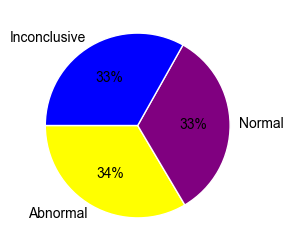

In [88]:
labels = df['Test Results'].value_counts().index
values = df['Test Results'].value_counts().values
plt.figure(figsize=(3,3))
plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%', startangle=180, textprops={'color': 'black'}) 
plt.show() 

<div class="alert alert-danger" style="background-color: #f7f0f0; color:black;" role="alert ">
  Dataset is balanced.
</div>

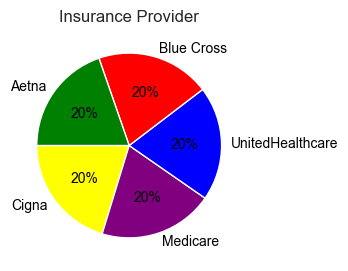

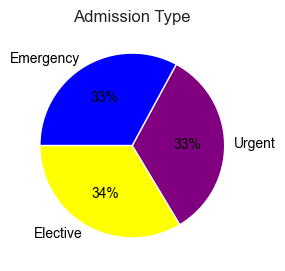

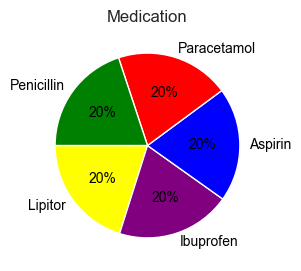

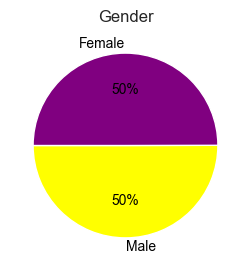

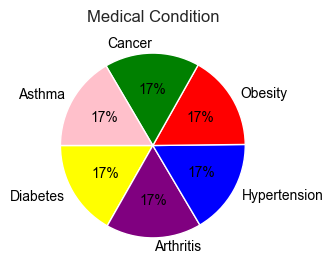

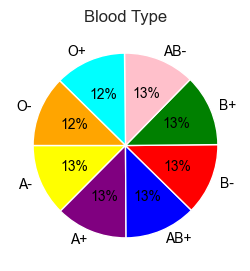

In [89]:
for i in categorical_features:
    labels = df[i].value_counts().index
    values = df[i].value_counts().values
    plt.figure(figsize=(3,3))
    plt.title(i)
    plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%', startangle=180, textprops={'color': 'black'}) 
    plt.show()

<div class="alert alert-danger" style="background-color: #f7f0f0; color:black;" role="alert ">
  All features are distributed approximately equal amount in dataset.
</div>

<div style="color: white; display: block; border-radius: 5px; background-color: #bd0f60; width: 50%; height: 60%; font-size: 80%; font-family: Verdana; letter-spacing: 0.5px;">
    <h2 style="padding: 10px; color: white;">Histogram Plot</h2>
</div>

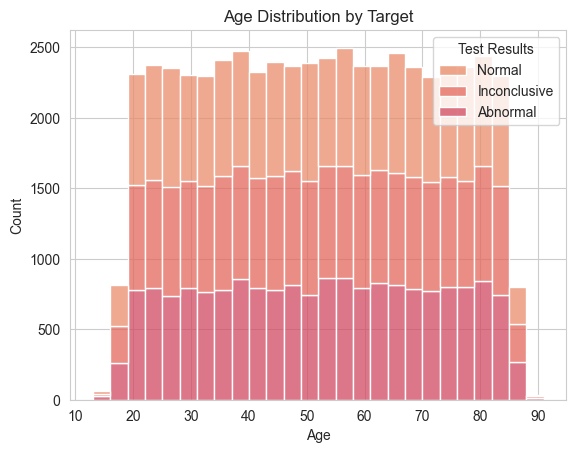

In [90]:
sns.histplot(data=df, x='Age', hue='Test Results', multiple='stack', binwidth=3, palette=sns.color_palette("flare"))
plt.title('Age Distribution by Target')
plt.show()

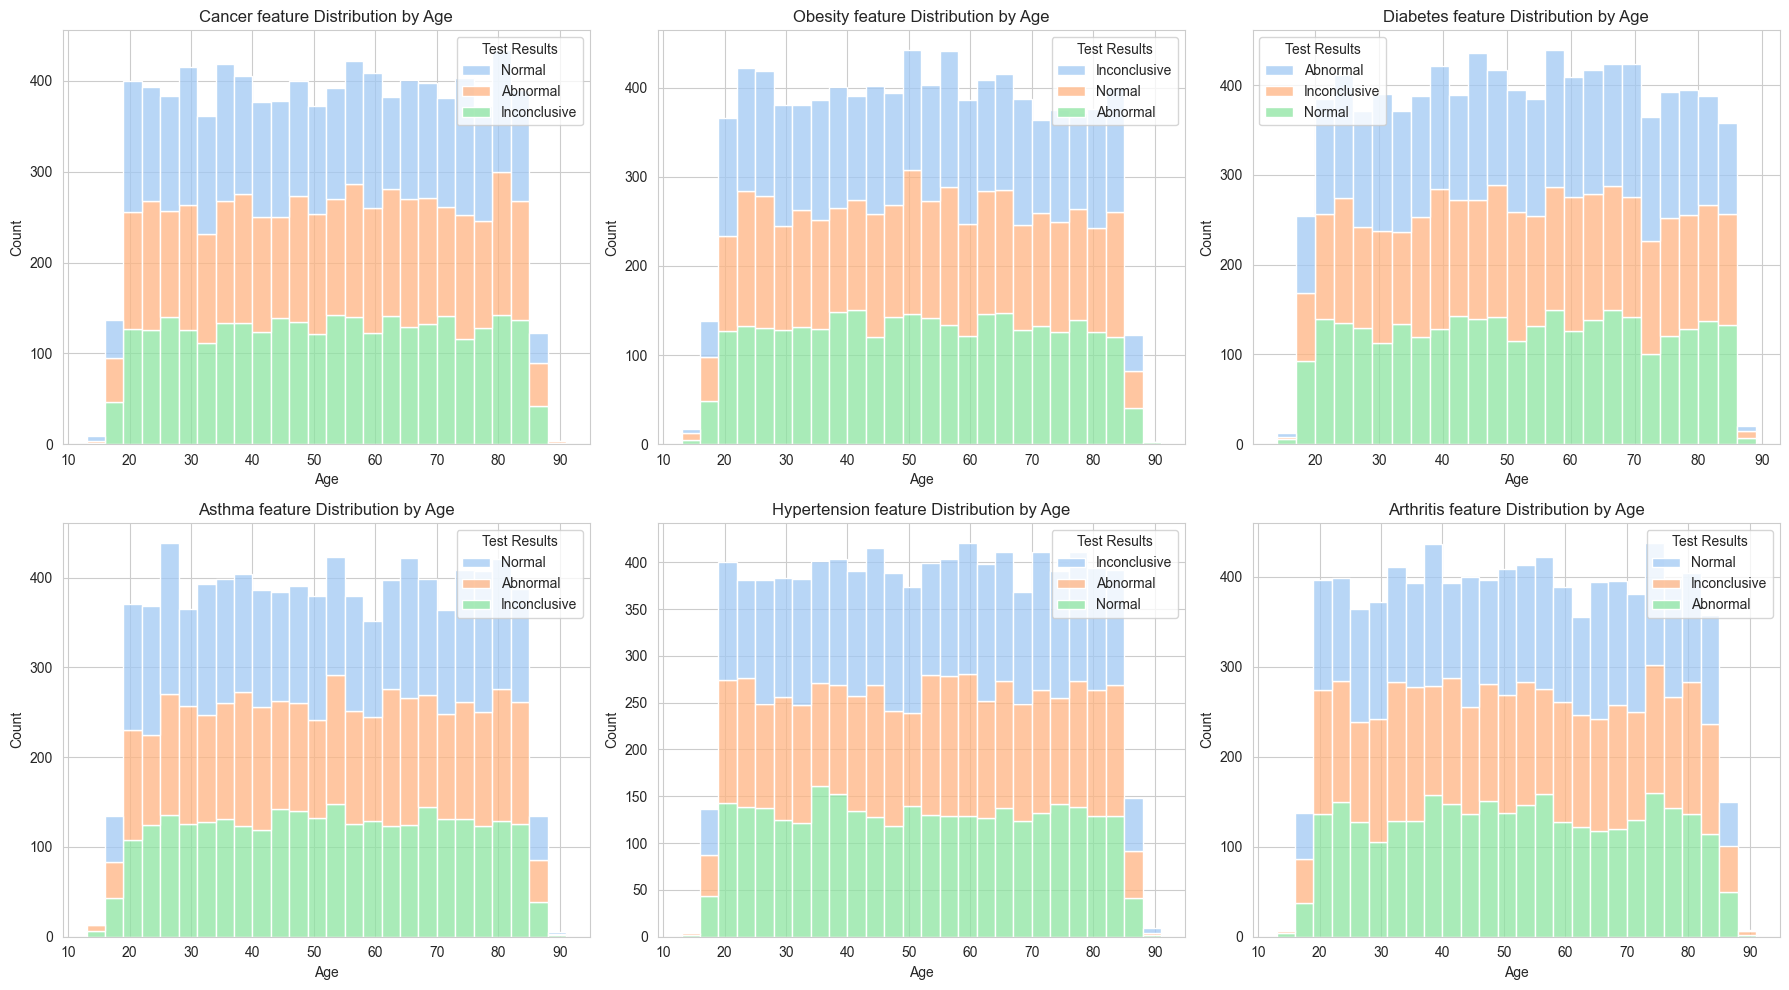

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for ind, i in enumerate(df['Medical Condition'].unique()):
    ax = axes[ind // 3, ind % 3]
    sns.histplot(data=df[df['Medical Condition']==i], x='Age', hue='Test Results', multiple='stack', binwidth=3,
                 palette=sns.color_palette("pastel"), ax=ax)
    ax.set_title(f'{i} feature Distribution by Age')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

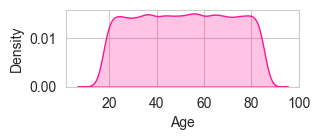

In [92]:
plt.figure(figsize=(3,1))
sns.kdeplot(df['Age'], color='deeppink', fill=True)

In [93]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

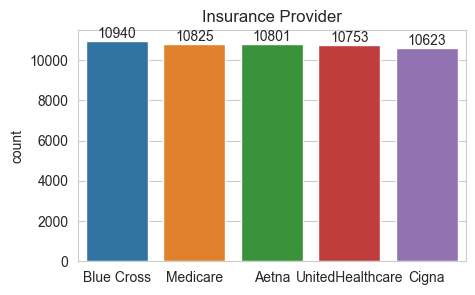

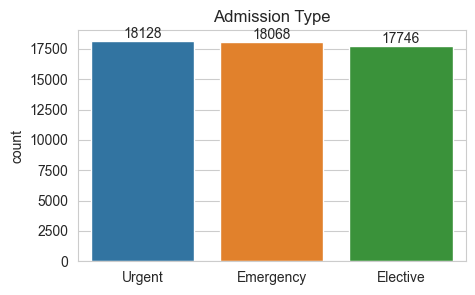

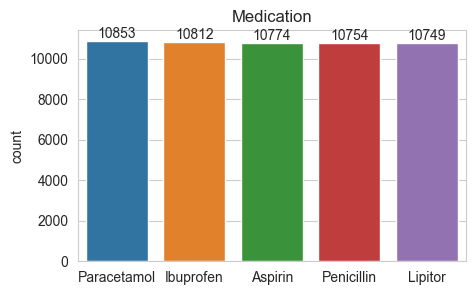

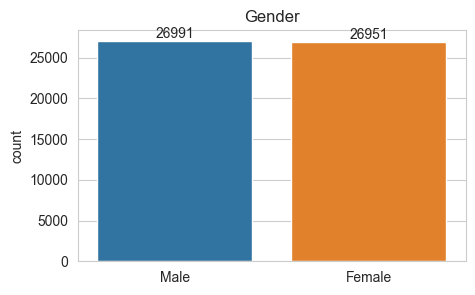

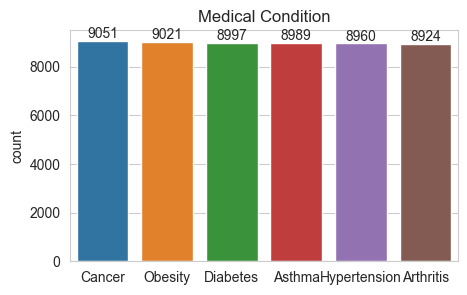

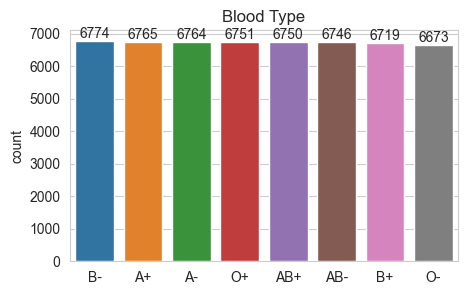

In [94]:
for i in categorical_features:
    plt.figure(figsize=(5,3))
    sns.set_style("whitegrid")
    ax = sns.barplot(df, x=df[i].unique(), y=df[i].value_counts(), estimator="sum")
    ax.set_title(i)
    ax.bar_label(ax.containers[0], fontsize=10);

In [95]:
df["Blood Type"].value_counts()

Blood Type
A-     6774
A+     6765
AB+    6764
B-     6751
B+     6750
AB-    6746
O+     6719
O-     6673
Name: count, dtype: int64

In [96]:
pastel_palette = px.colors.qualitative.Plotly_r

for i in categorical_features:
    fig = go.Figure()
    for ind, (feature_category, count) in enumerate(df[i].value_counts().items()):
        fig.add_trace(go.Bar(x=[i], y=[count], name=feature_category, marker_color=pastel_palette[ind]))
        fig.update_layout(title=f'Distribution of {i}', xaxis_title=i, yaxis_title='Count')
    fig.show()

In [97]:
 df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

,Admission Type,Gender,Count
0,Elective,Female,9103
1,Elective,Male,9025
2,Emergency,Female,8978
3,Emergency,Male,8768
4,Urgent,Female,8870
5,Urgent,Male,9198


In [98]:
pastel_palette = px.colors.qualitative.Pastel
grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Admission Type and Gender',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Gender': 'Gender'})
fig.show()

In [99]:
pastel_palette = px.colors.qualitative.Pastel
grouped_df = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

fig = px.bar(grouped_df, x='Medical Condition', y='Count', color='Gender', barmode='group',
             title='Patient Count by Medical Condition and Gender',
             labels={'Count': 'Patient Count', 'Medical Condition': 'Medical Condition', 'Gender': 'Gender'})
fig.show()

<div style="color: white; display: block; border-radius: 5px; background-color: #bd0f60; width: 50%; height: 60%; font-size: 80%; font-family: Verdana; letter-spacing: 0.5px;">
    <h2 style="padding: 10px; color: white;">Outlier Detection</h2>
</div>

In [100]:
mylib.detect_outliers(df, ['Age']) # There is no outlier with IQR

[]

In [101]:
df[categorical_features]

,Insurance Provider,Admission Type,Medication,Gender,Medical Condition,Blood Type
0,Blue Cross,Urgent,Paracetamol,Male,Cancer,B-
1,Medicare,Emergency,Ibuprofen,Male,Obesity,A+
2,Aetna,Emergency,Aspirin,Female,Obesity,A-
3,Medicare,Elective,Ibuprofen,Female,Diabetes,O+
4,Aetna,Urgent,Penicillin,Female,Cancer,AB+
...,...,...,...,...,...,...
53937,Blue Cross,Elective,Penicillin,Female,Asthma,O+
53938,Cigna,Elective,Aspirin,Female,Obesity,AB-
53939,UnitedHealthcare,Urgent,Ibuprofen,Female,Hypertension,B+
53940,Medicare,Elective,Ibuprofen,Male,Arthritis,O-


In [102]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))
df_sklearn_encoded = pd.concat([df.drop(categorical_features, axis=1), one_hot_df], axis=1)

In [103]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

model = IsolationForest(random_state=42, contamination=0.001, n_jobs=-1)

param_grid = {
    'n_estimators': [100],
    'max_samples': ['auto', 0.5, 0.7, 0.9],
}

grid_search = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
features = df_sklearn_encoded.drop(columns=['Test Results'])
grid_search.fit(features)
print("Best Parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
df_sklearn_encoded['outlier_isolation'] = best_model.predict(features)
outliers = df_sklearn_encoded[df_sklearn_encoded['outlier_isolation'] == -1]
normal = df_sklearn_encoded[df_sklearn_encoded['outlier_isolation'] == 1]
print(f"Number of outliers: {len(outliers)}")
print(f"Number of normal points: {len(normal)}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters found:  {'max_samples': 'auto', 'n_estimators': 100}
Number of outliers: 54
Number of normal points: 53888


<div class="alert alert-danger" style="background-color: #f7f0f0; color:black;" role="alert ">
  54 row/data is outlier in dataset.
</div>

In [104]:
outliers.tail(3) # Example outlier datas.

,Age,Test Results,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,...,Medical Condition_Hypertension,Medical Condition_Obesity,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,outlier_isolation
52704,77,Normal,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
52804,86,Inconclusive,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
53424,67,Inconclusive,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1


In [105]:
normal.reset_index(drop=True, inplace=True)

In [106]:
normal.drop(columns=['outlier_isolation'], inplace=True)

In [107]:
map_dict = {'Normal' : 1, 'Inconclusive' : 2, 'Abnormal' : 3}
normal['Test Results'] = normal['Test Results'].map(map_dict)

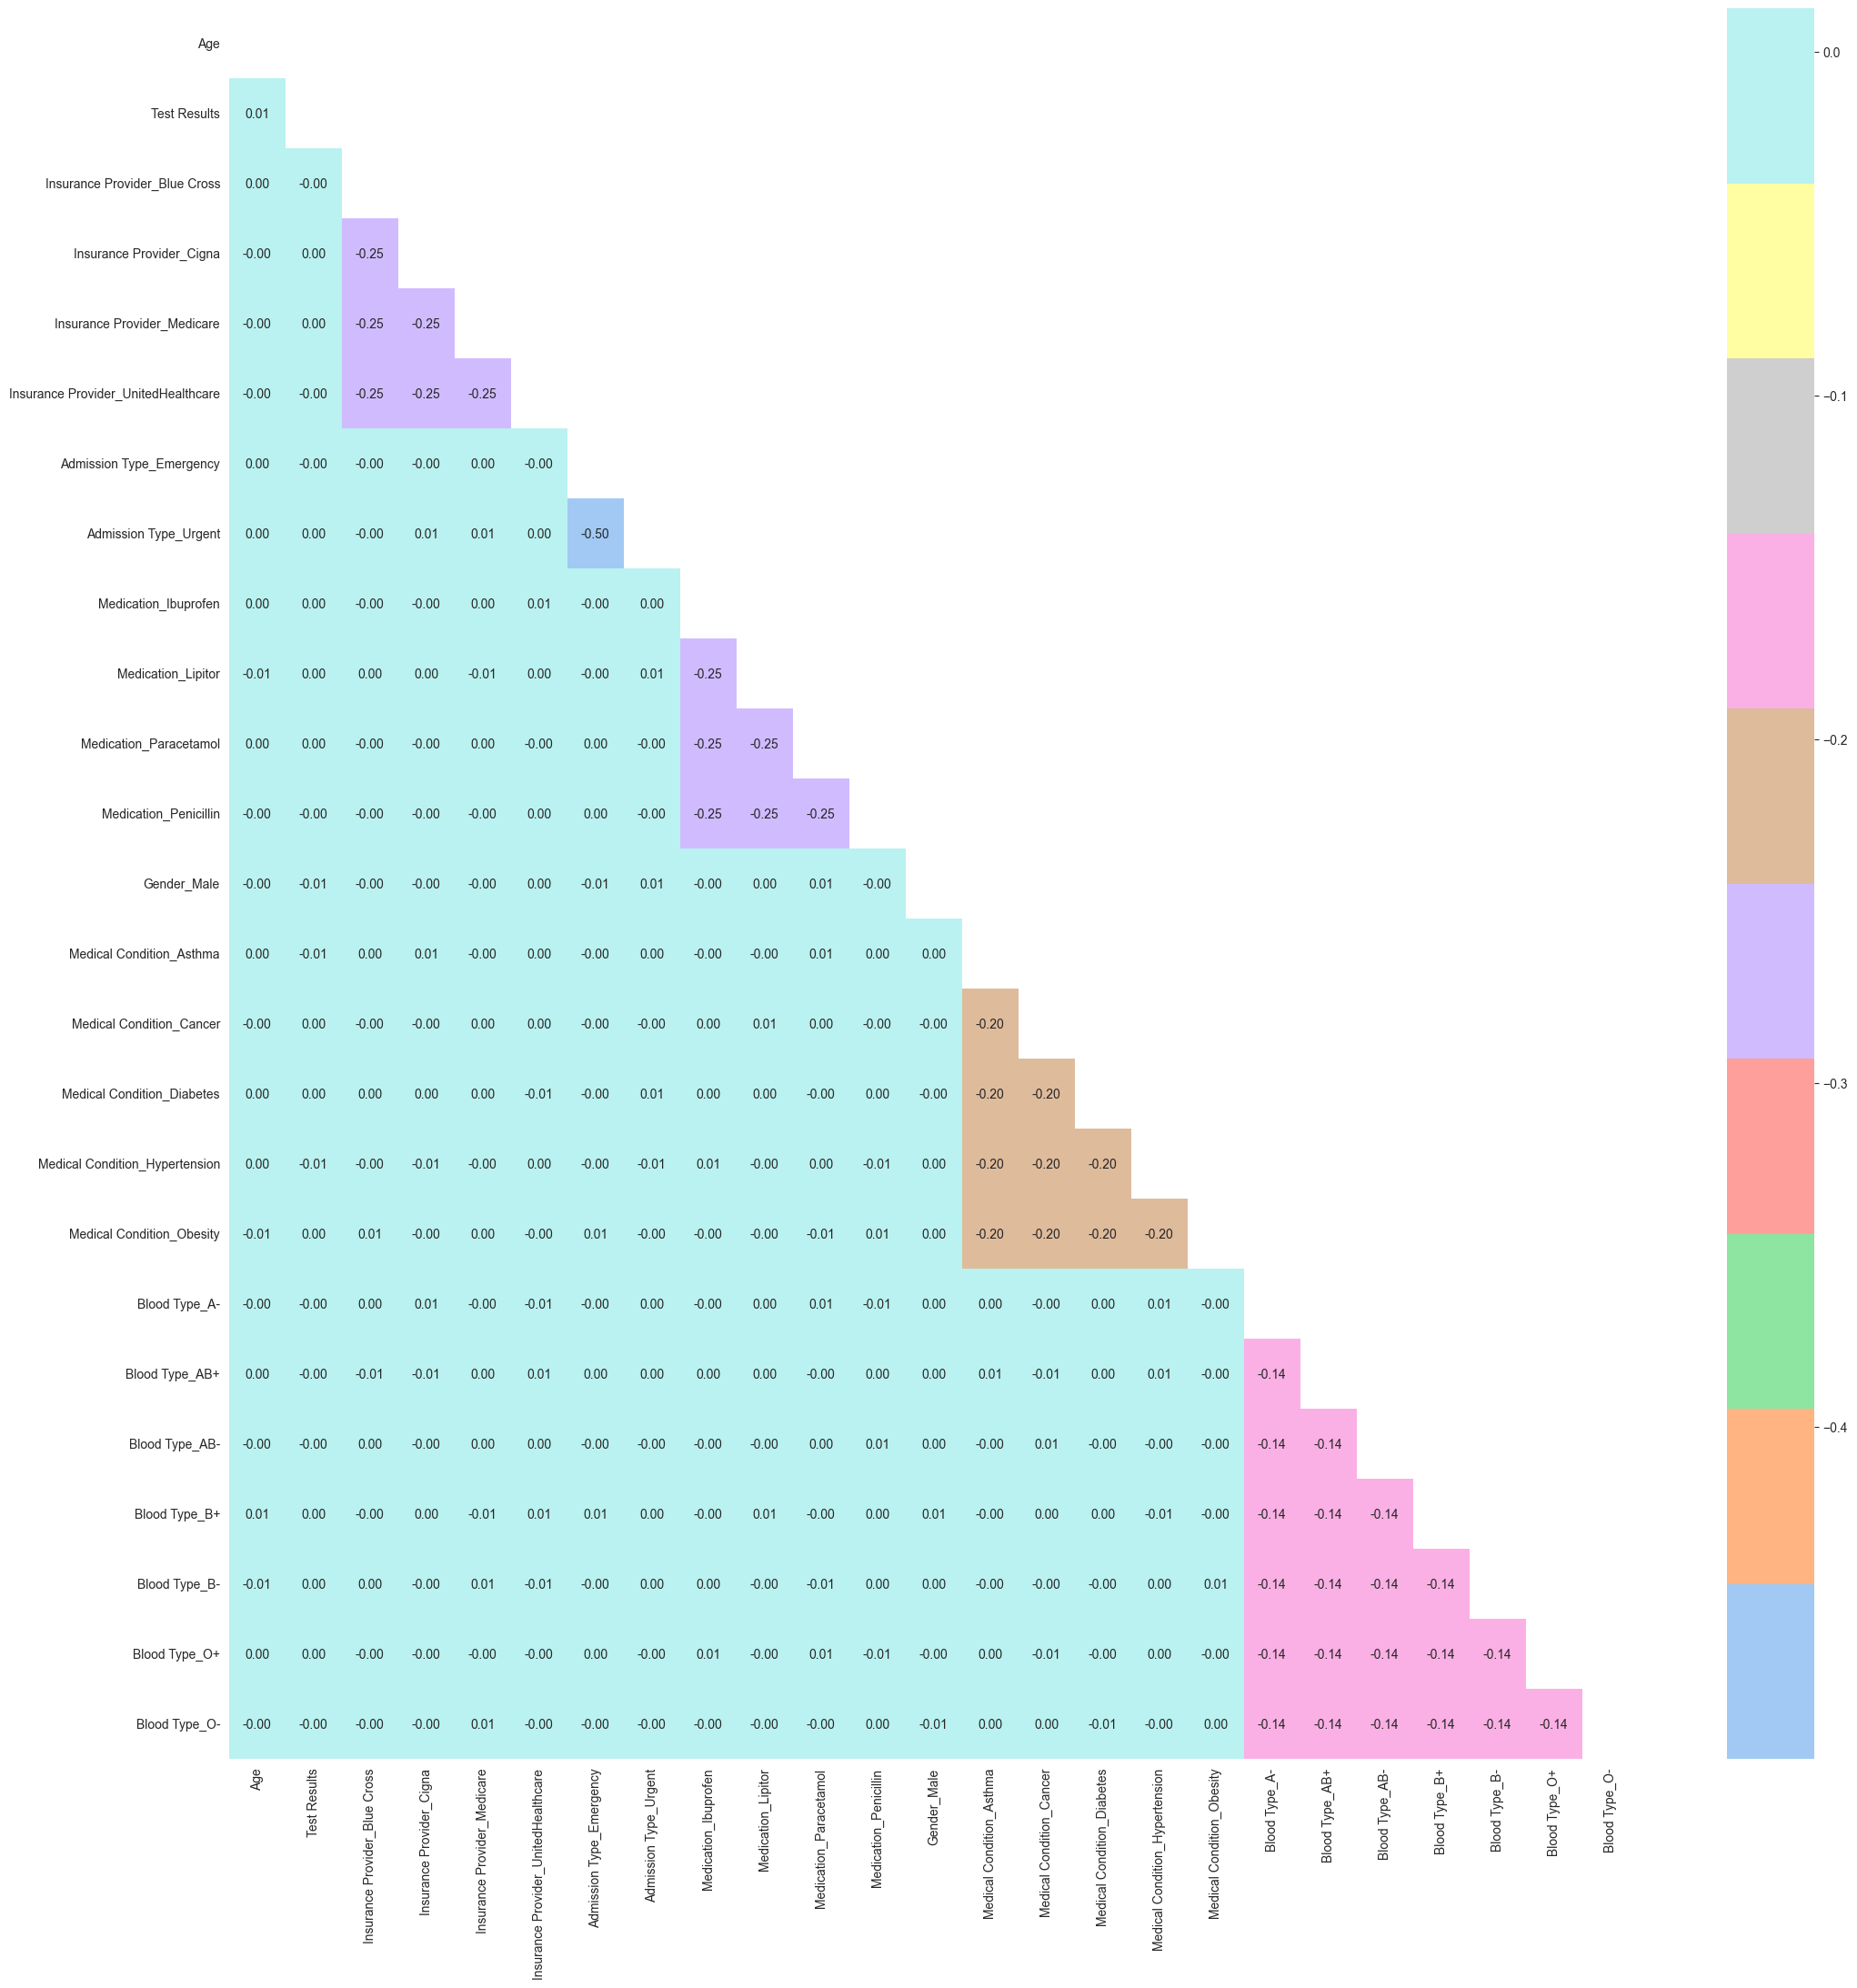

In [108]:
from matplotlib.colors import LinearSegmentedColormap
data = normal
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(25,25))  
# plotting a triangle correlation heatmap 
dataplot = sns.heatmap(data.corr(), cmap=sns.color_palette('pastel'), annot=True, mask=mask, fmt='.2f') 

plt.show() 

In [70]:
# end